# Abstract

This project is aimed at identifying high quality wine by machine learning models. After a number of machine learning models were built, random forest outperform the rest with 0.92 AUC. The feature importance of random forest suggests that alcohol by volumn, densiity, sulphates and residual sugar affect the quality of wine substantially.

# Outline

1. Preliminary data processing
    * Import data and understand the meaning of each variables.
    * Merge data sets and create some useful new variables.
    * Transform data to form our prediction target.
2. Explore the data
    * Compute descriptive statistics and plot histograms of numerical variables.
    * Visualaize correlation between variables via heatmap.
    * Contrast the difference between two types of wine. 
    * Generate boxplots to visualize the difference.
    * Draw bar charts to see the number of data points in each category of wine and quality.
    * Contrast the difference between qualities of wine and visualize the difference.
    * Check Simpson's paradox by forming a bunch of boxplot.
3. Predictive modeling
    * Preprocss the data includiing one-got encoding, feature scaling, train-test set split.
    * Write functions to display and visualize prediction performance of model.
    * Implement and tuning the following models:
        * Logistics regression
        * K nearest neighbor
        * Gaussian Naive Bayes
        * Support Vector Machine
        * Decision tree
        * Random Forest 
        * Gradient boosting tree
    * Compare prediction performances between models with receiver operating characteristc (ROC) curve.

___

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 120

import warnings
warnings.filterwarnings('ignore')

The data of wine is obtained from UCI machine learning repository:[Data](https://archive.ics.uci.edu/ml/datasets/wine+quality). The original source of the data is this paper:
[Paper](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub)

# Preliminary Data processing

## Import data and understand the meanings of each variables

In [3]:
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red = pd.read_csv(red_url, sep=";")
white = pd.read_csv(white_url, sep=";")

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* fixed acidity:固定酸度
* volatile acidity:揮發性酸度
* citric acid:檸檬酸
* residual sugar is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes.
* chlorides: 氯化物
* sulfur dioxide :二氧化硫
* sulphates:硫酸鹽

In [9]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Two data sets share same attrtibutes. We need to combine two data sets and create a "wine type" variable.

## Merge red and white win data set and create a "type" variable.

In [11]:
white["type"] = "white"
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [12]:
red["type"] = "red"
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
wine = pd.concat([white, red], axis=0)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


The quality of wine could be labeled as follows:
* low - 3,4,5
* medium - 6,7
* high - 8,9

## Mapping quality of wine to quality label

In [14]:
wine["quality_label"] = wine["quality"].apply(
    lambda x: "low" if x <=5 else "medium" if x <= 7 else "high" 
    )
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [15]:
# transfer data type
wine["quality_label"] = pd.Categorical(
    wine["quality_label"], 
    categories=["low", "medium", "high"]
    )

wine["type"] = pd.Categorical(
    wine["type"], 
    categories=["red", "white"]
    )

# Explore the data

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   category
 13  quality_label         6497 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 672.

We can see that there are 6497 data points in the data set with no missing values. There are 14 variables in the data set, 2 categorical variables and 11 numerical variables.

## Descriptive statistics

In [17]:
round(wine.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


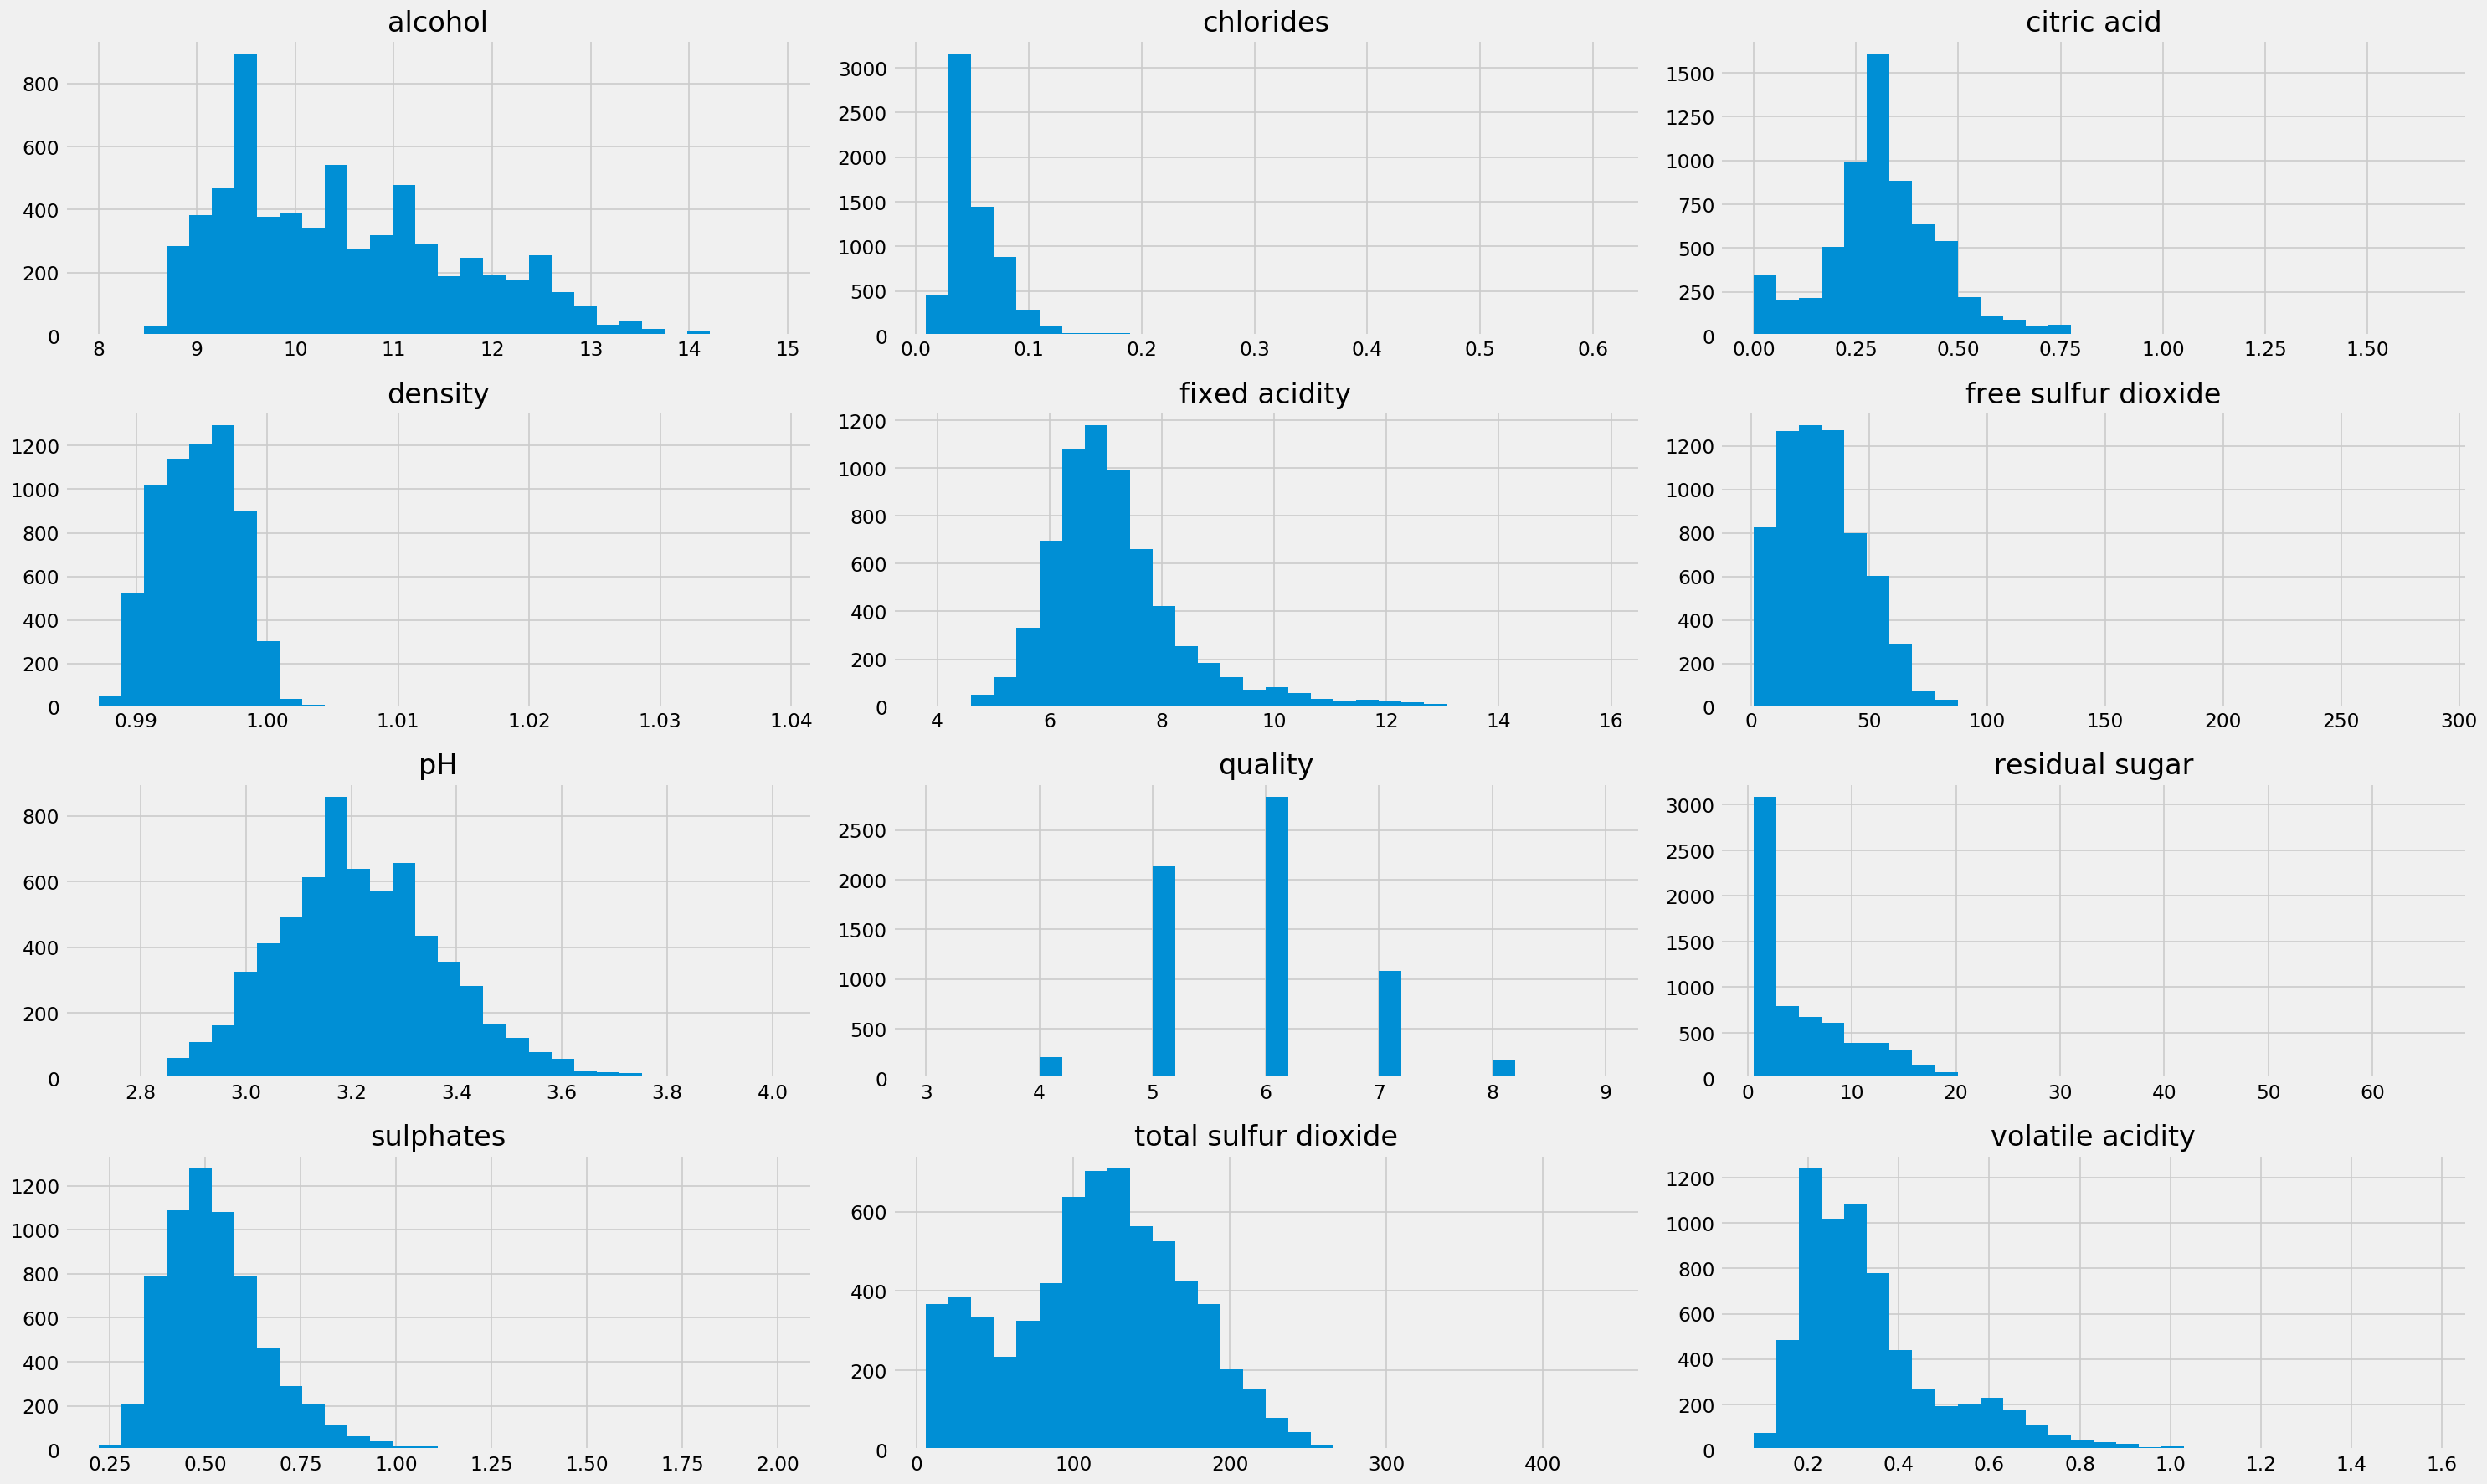

In [34]:
wine.hist(figsize=(25,15), bins=30)
plt.tight_layout()

___

## Differences between two types of wine

### Numerical variables

In [19]:
rt = wine[wine.type == "red"].describe().round(2)
wt = wine[wine.type == "white"].describe().round(2)

pd.concat([rt, wt], 
          keys=["Red wine", "White wine"])

fixed acidity  volatile acidity  citric acid  \
Red wine   count        1599.00           1599.00      1599.00   
           mean            8.32              0.53         0.27   
           std             1.74              0.18         0.19   
           min             4.60              0.12         0.00   
           25%             7.10              0.39         0.09   
           50%             7.90              0.52         0.26   
           75%             9.20              0.64         0.42   
           max            15.90              1.58         1.00   
White wine count        4898.00           4898.00      4898.00   
           mean            6.85              0.28         0.33   
           std             0.84              0.10         0.12   
           min             3.80              0.08         0.00   
           25%             6.30              0.21         0.27   
           50%             6.80              0.26         0.32   
           75%             7.30              0.32         0.39   
           max            14.20              1.10         1.66   

                  residual sugar  chlorides  free sulfur dioxide  \
Red wine   count         1599.00    1599.00              1599.00   
           mean             2.54       0.09                15.87   
           std              1.41       0.05                10.46   
           min              0.90       0.01                 1.00   
           25%              1.90       0.07                 7.00   
           50%              2.20       0.08                14.00   
           75%              2.60       0.09                21.00   
           max             15.50       0.61                72.00   
White wine count         4898.00    4898.00              4898.00   
           mean             6.39       0.05                35.31   
           std              5.07       0.02                17.01   
           min              0.60       0.01                 2.00   
           25%              1.70       0.04                23.00   
           50%              5.20       0.04                34.00   
           75%              9.90       0.05                46.00   
           max             65.80       0.35               289.00   

                  total sulfur dioxide  density       pH  sulphates  alcohol  \
Red wine   count               1599.00  1599.00  1599.00    1599.00  1599.00   
           mean                  46.47     1.00     3.31       0.66    10.42   
           std                   32.90     0.00     0.15       0.17     1.07   
           min                    6.00     0.99     2.74       0.33     8.40   
           25%                   22.00     1.00     3.21       0.55     9.50   
           50%                   38.00     1.00     3.31       0.62    10.20   
           75%                   62.00     1.00     3.40       0.73    11.10   
           max                  289.00     1.00     4.01       2.00    14.90   
White wine count               4898.00  4898.00  4898.00    4898.00  4898.00   
           mean                 138.36     0.99     3.19       0.49    10.51   
           std                   42.50     0.00     0.15       0.11     1.23   
           min                    9.00     0.99     2.72       0.22     8.00   
           25%                  108.00     0.99     3.09       0.41     9.50   
           50%                  134.00     0.99     3.18       0.47    10.40   
           75%                  167.00     1.00     3.28       0.55    11.40   
           max                  440.00     1.04     3.82       1.08    14.20   

                  quality  
Red wine   count  1599.00  
           mean      5.64  
           std       0.81  
           min       3.00  
           25%       5.00  
           50%       6.00  
           75%       6.00  
           max       8.00  
White wine count  4898.00  
           mean      5.88  
           std       0.89  
           min       3.00  
           25

As we can see in the table above, the following variables seem to have considerable differences between two types of wine:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* sulphates

which worth deeper inspection.

In [ ]:
attribute = [
    "fixed acidity", "volatile acidity", "citric acid", 
    "residual sugar","chlorides", "free sulfur dioxide", 
    "total sulfur dioxide", "sulphates"
    ]

fig, ax = plt.subplots(4, 2, figsize=(20, 40))
for axis, attr in zip(ax.flat, attribute):
    sns.boxplot(x="type", y=attr, ax=axis,
                data=wine)
    
plt.tight_layout(h_pad=4)

In [ ]:
wine.corr()

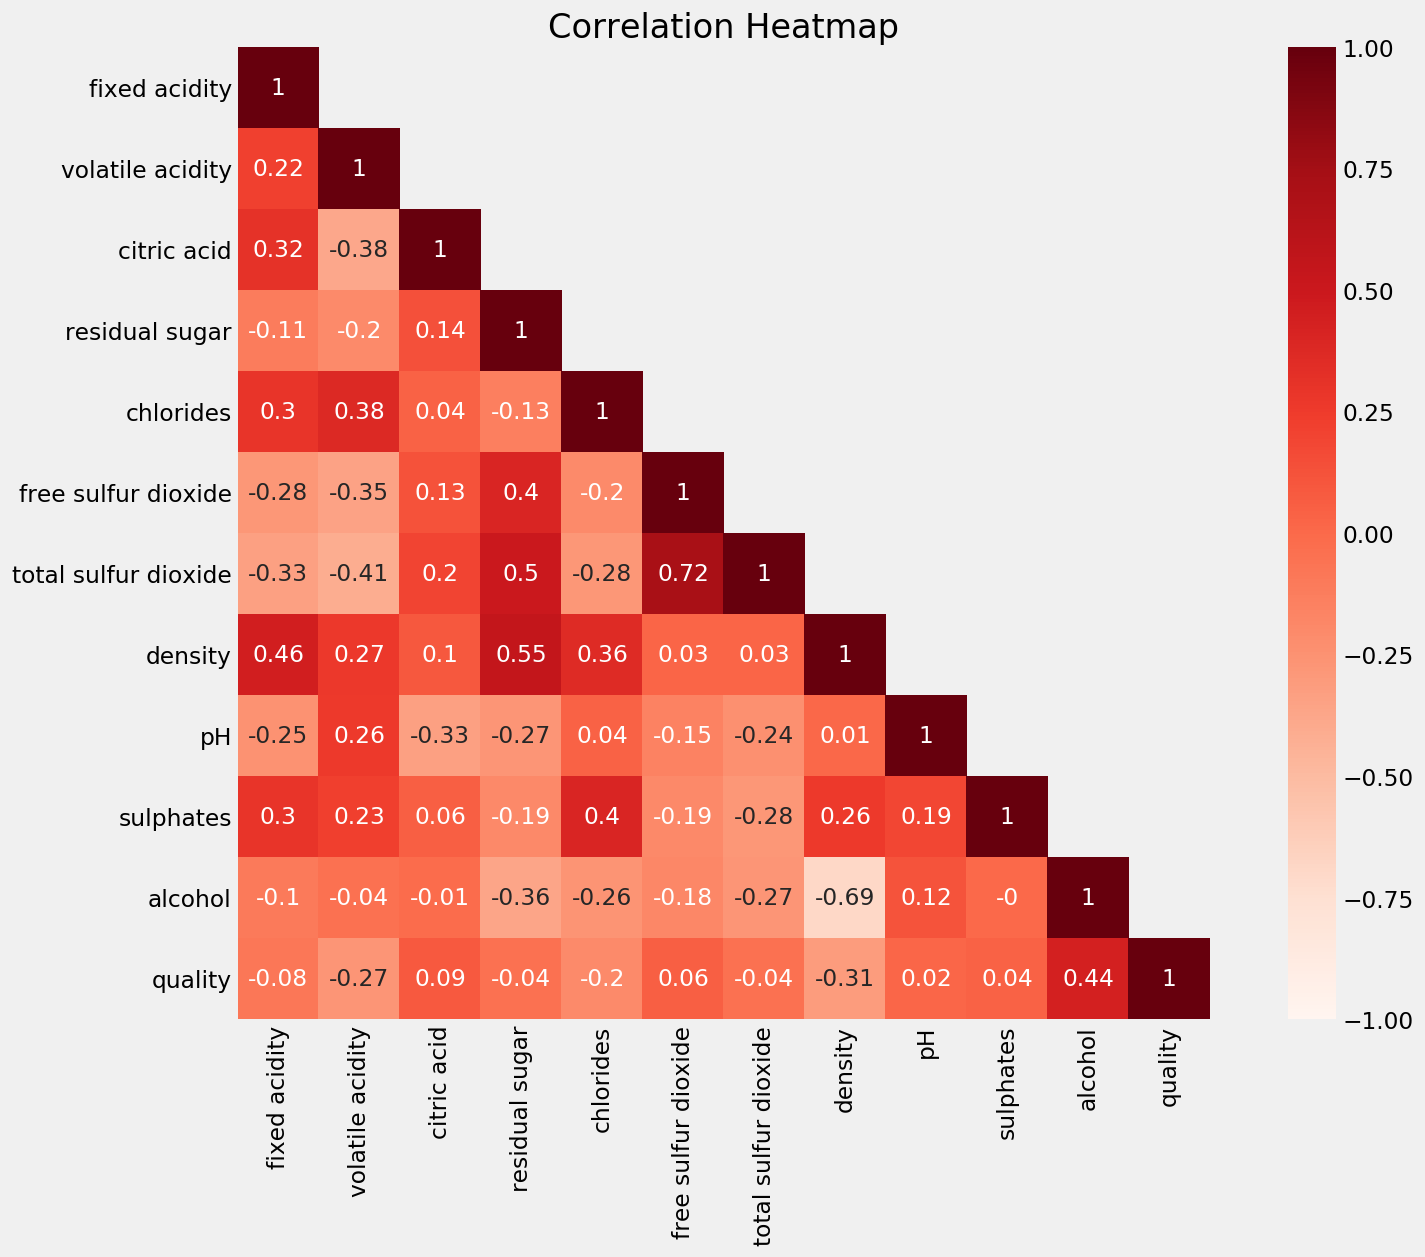

In [36]:
mask = np.array(wine.corr())
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(15,10))
sns.heatmap(np.round(wine.corr(),2), 
            square=True, 
            annot=True, vmax=1, vmin=-1, 
            mask=mask, cmap="Reds")
plt.title("Correlation Heatmap", position=(.5, 1));

#### Quality between different types of wine

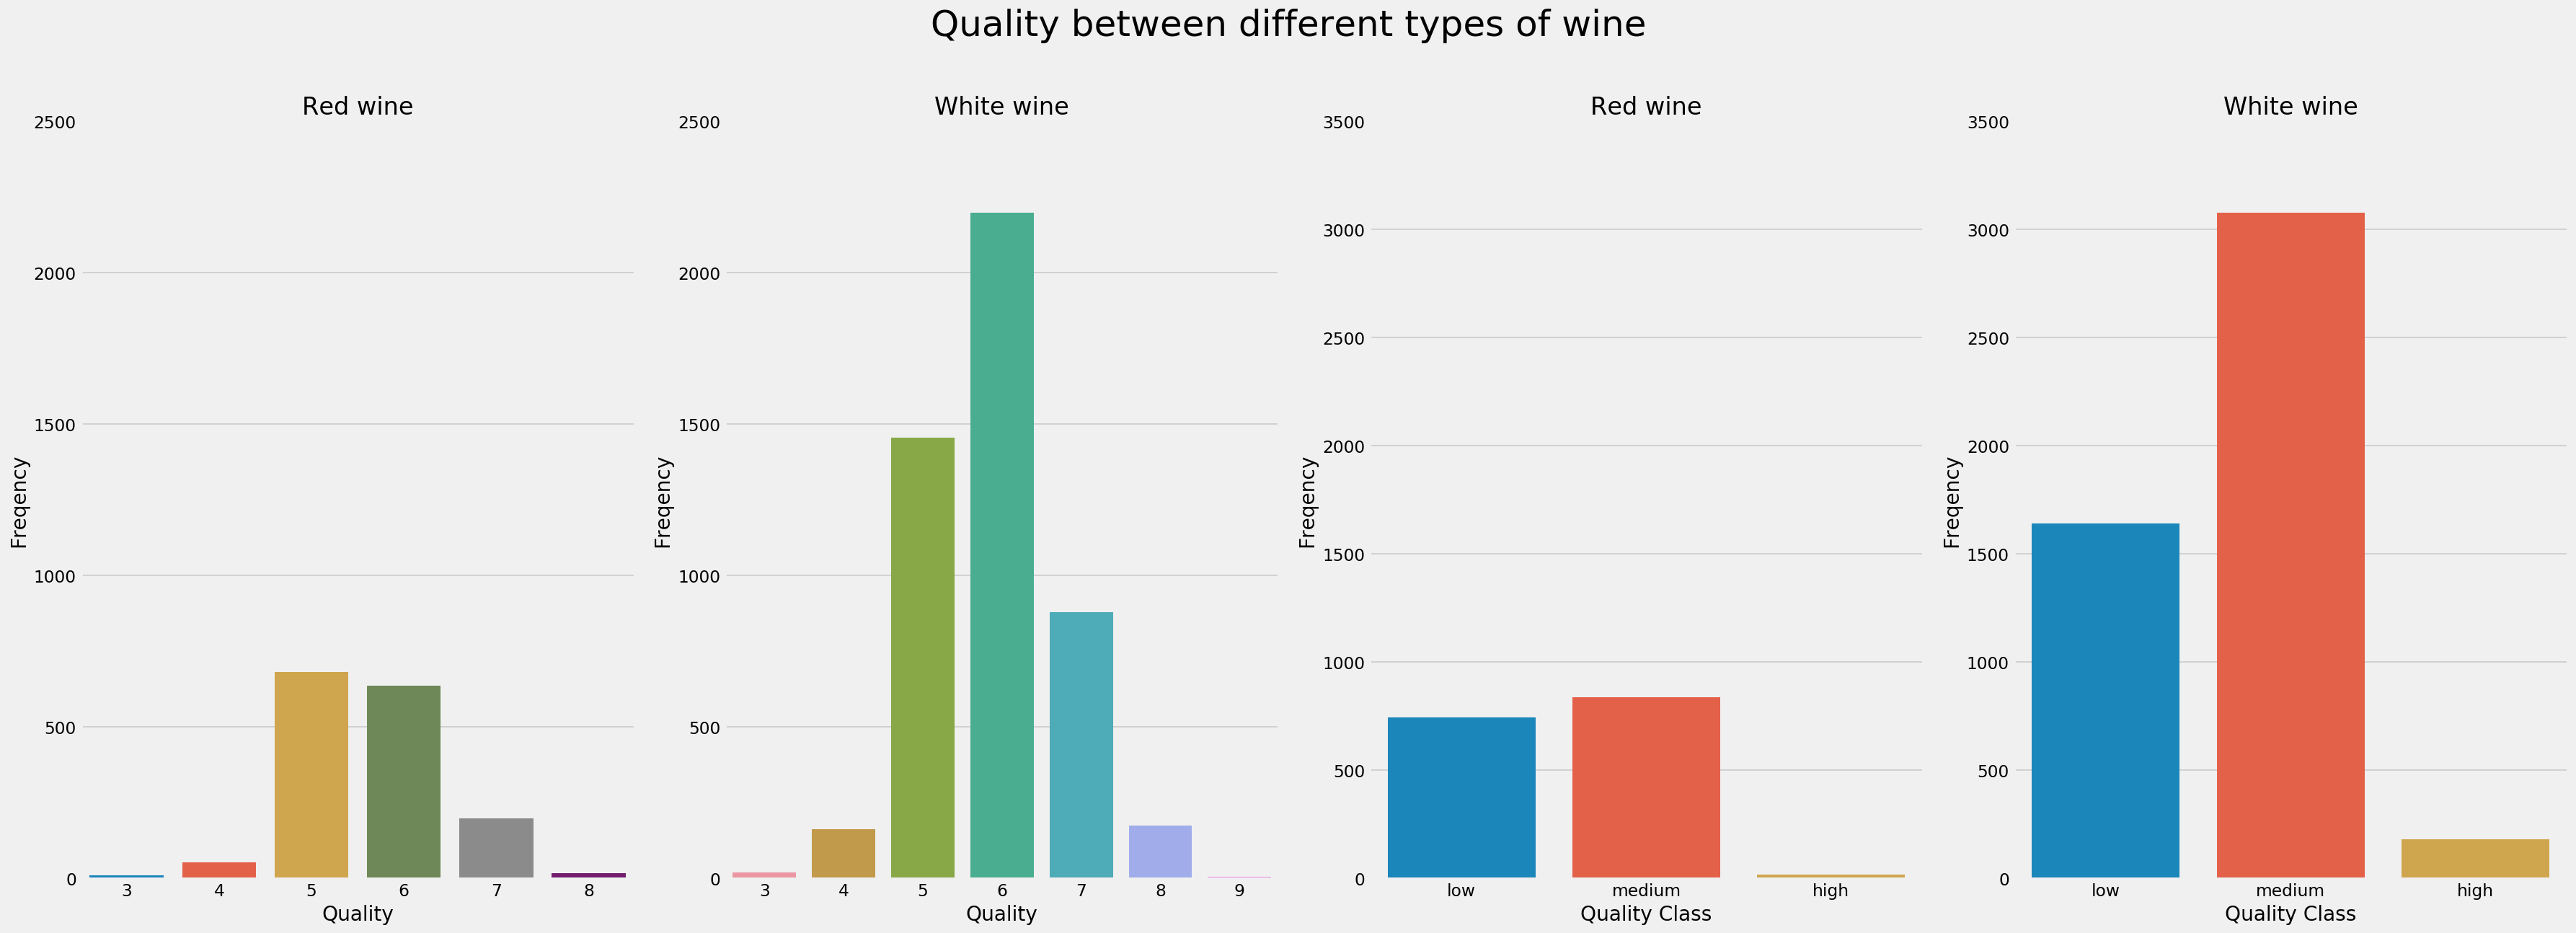

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
fig.suptitle("Quality between different types of wine", 
             fontsize=30, position=(.5,1.08))

# plot quality frequencies
## red wine
rw_q = wine[wine.type == "red"]["quality"].value_counts()
sns.barplot(rw_q.index, rw_q.values, ax=ax[0])
ax[0].set_xlabel("Quality")
ax[0].set_ylabel("Freqency")
ax[0].set_title("Red wine")
ax[0].set_ylim([0, 2500])
## white wine
ww_q = wine[wine.type == "white"]["quality"].value_counts()
sns.barplot(ww_q.index, ww_q.values, ax=ax[1])
ax[1].set_xlabel("Quality")
ax[1].set_ylabel("Freqency")
ax[1].set_title("White wine")
ax[1].set_ylim([0, 2500])

# plot quality class frequencies
## red wine
rw_ql = wine[wine.type == "red"]["quality_label"].value_counts()
sns.barplot(rw_ql.index, rw_ql.values, ax=ax[2])
ax[2].set_xlabel("Quality Class")
ax[2].set_ylabel("Freqency")
ax[2].set_title("Red wine")
ax[2].set_ylim([0, 3500])
## white wine
ww_ql = wine[wine.type == "white"]["quality_label"].value_counts()
sns.barplot(ww_ql.index, ww_ql.values, ax=ax[3])
ax[3].set_xlabel("Quality Class")
ax[3].set_ylabel("Freqency")
ax[3].set_title("White wine")
ax[3].set_ylim([0, 3500])


plt.tight_layout()

Since there are much more white wine in our data, we can normalize the data to see the relative frequency.

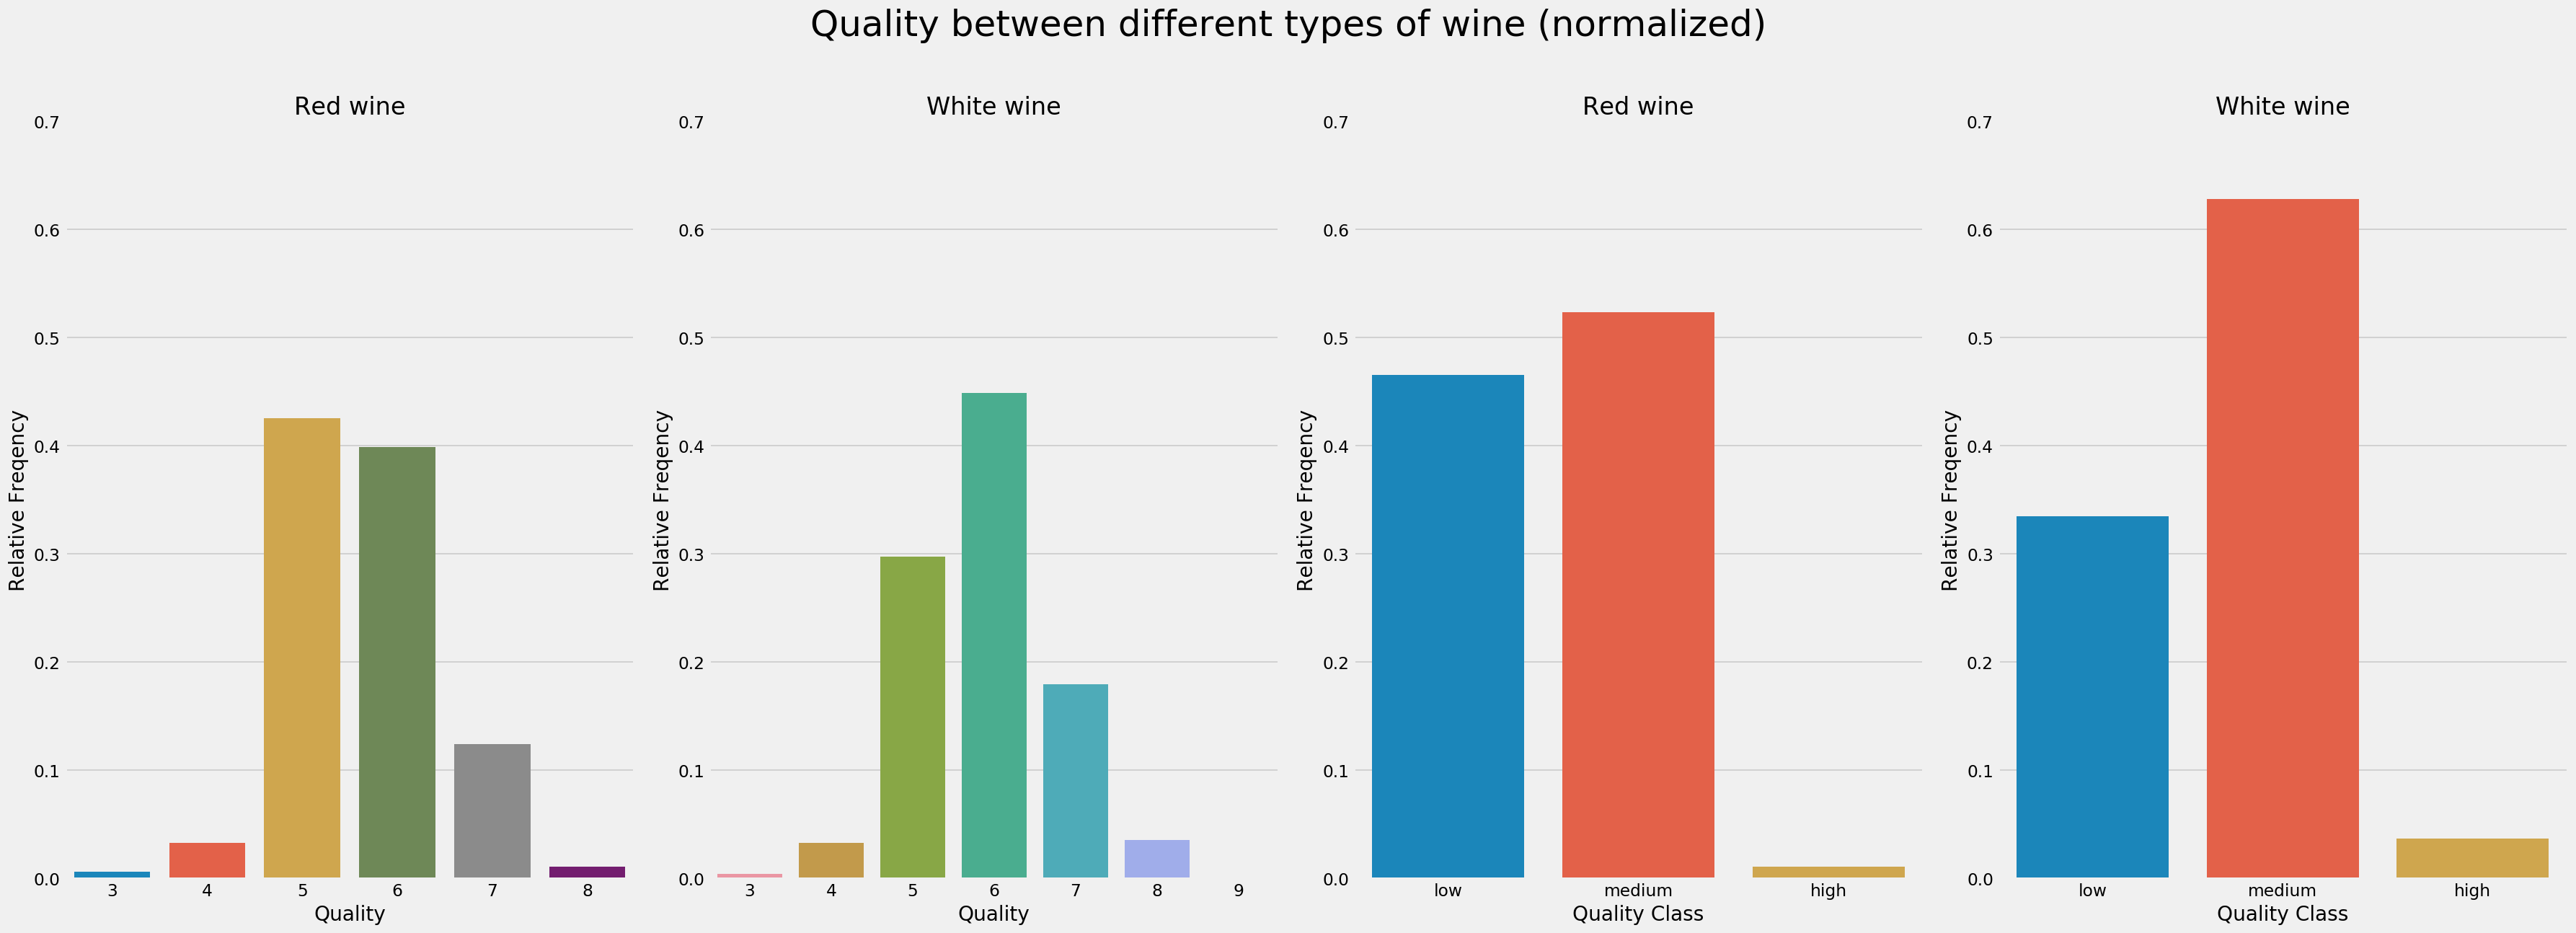

In [38]:
# normalized bar chart
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
fig.suptitle("Quality between different types of wine (normalized)", 
             fontsize=30, 
             position=(.5,1.08))

# plot nomarlized quality frequencies
rw_q = wine[wine.type == "red"]["quality"].value_counts(normalize=True)
sns.barplot(rw_q.index, rw_q.values, ax=ax[0])
ax[0].set_xlabel("Quality")
ax[0].set_ylabel("Relative Freqency")
ax[0].set_title("Red wine")
ax[0].set_ylim([0, .7])

ww_q = wine[wine.type == "white"]["quality"].value_counts(normalize=True)
sns.barplot(ww_q.index, ww_q.values, ax=ax[1])
ax[1].set_xlabel("Quality")
ax[1].set_ylabel("Relative Freqency")
ax[1].set_title("White wine")
ax[1].set_ylim([0, .7])

# plot nomarlized quality class frequencies
rw_ql = wine[wine.type == "red"]["quality_label"].value_counts(normalize=True)
sns.barplot(rw_ql.index, rw_ql.values, ax=ax[2])
ax[2].set_xlabel("Quality Class")
ax[2].set_ylabel("Relative Freqency")
ax[2].set_title("Red wine")
ax[2].set_ylim([0, .7])
           
ww_ql = wine[wine.type == "white"]["quality_label"].value_counts(normalize=True)
sns.barplot(ww_ql.index, ww_ql.values, ax=ax[3])
ax[3].set_xlabel("Quality Class")
ax[3].set_ylabel("Relative Freqency")
ax[3].set_title("White wine")
ax[3].set_ylim([0, .7])


plt.tight_layout()

## Differences between different qualities of wine

In [ ]:
hq = wine[wine.quality_label == "high"]
mq = wine[wine.quality_label == "medium"]
lq = wine[wine.quality_label == "low"]

In [ ]:
pd.concat(
    [hq.describe(), mq.describe(), lq.describe()], 
    keys=["High", "Medium", "Low"]
    ).round(2)

In [ ]:
attribute = [
    "fixed acidity", "volatile acidity", "citric acid", 
    "residual sugar","chlorides", "free sulfur dioxide", 
    "total sulfur dioxide", "sulphates"
    ]

fig, ax = plt.subplots(4, 2, figsize=(20, 40))
for axis, attr in zip(ax.flat, attribute):
    sns.boxplot(x="quality_label", y=attr, ax=axis,
                data=wine)
    
plt.tight_layout(h_pad=4)

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x="quality_label", 
            y="alcohol", data=wine)
plt.title(
    "Alcohol difference between different quality of wine", 
    loc="center"
    )
plt.ylabel("alchohol %v")

It seems that high quality wine normally contains higher percentage of alchohol.

### Check if there exists Simpson's paradox

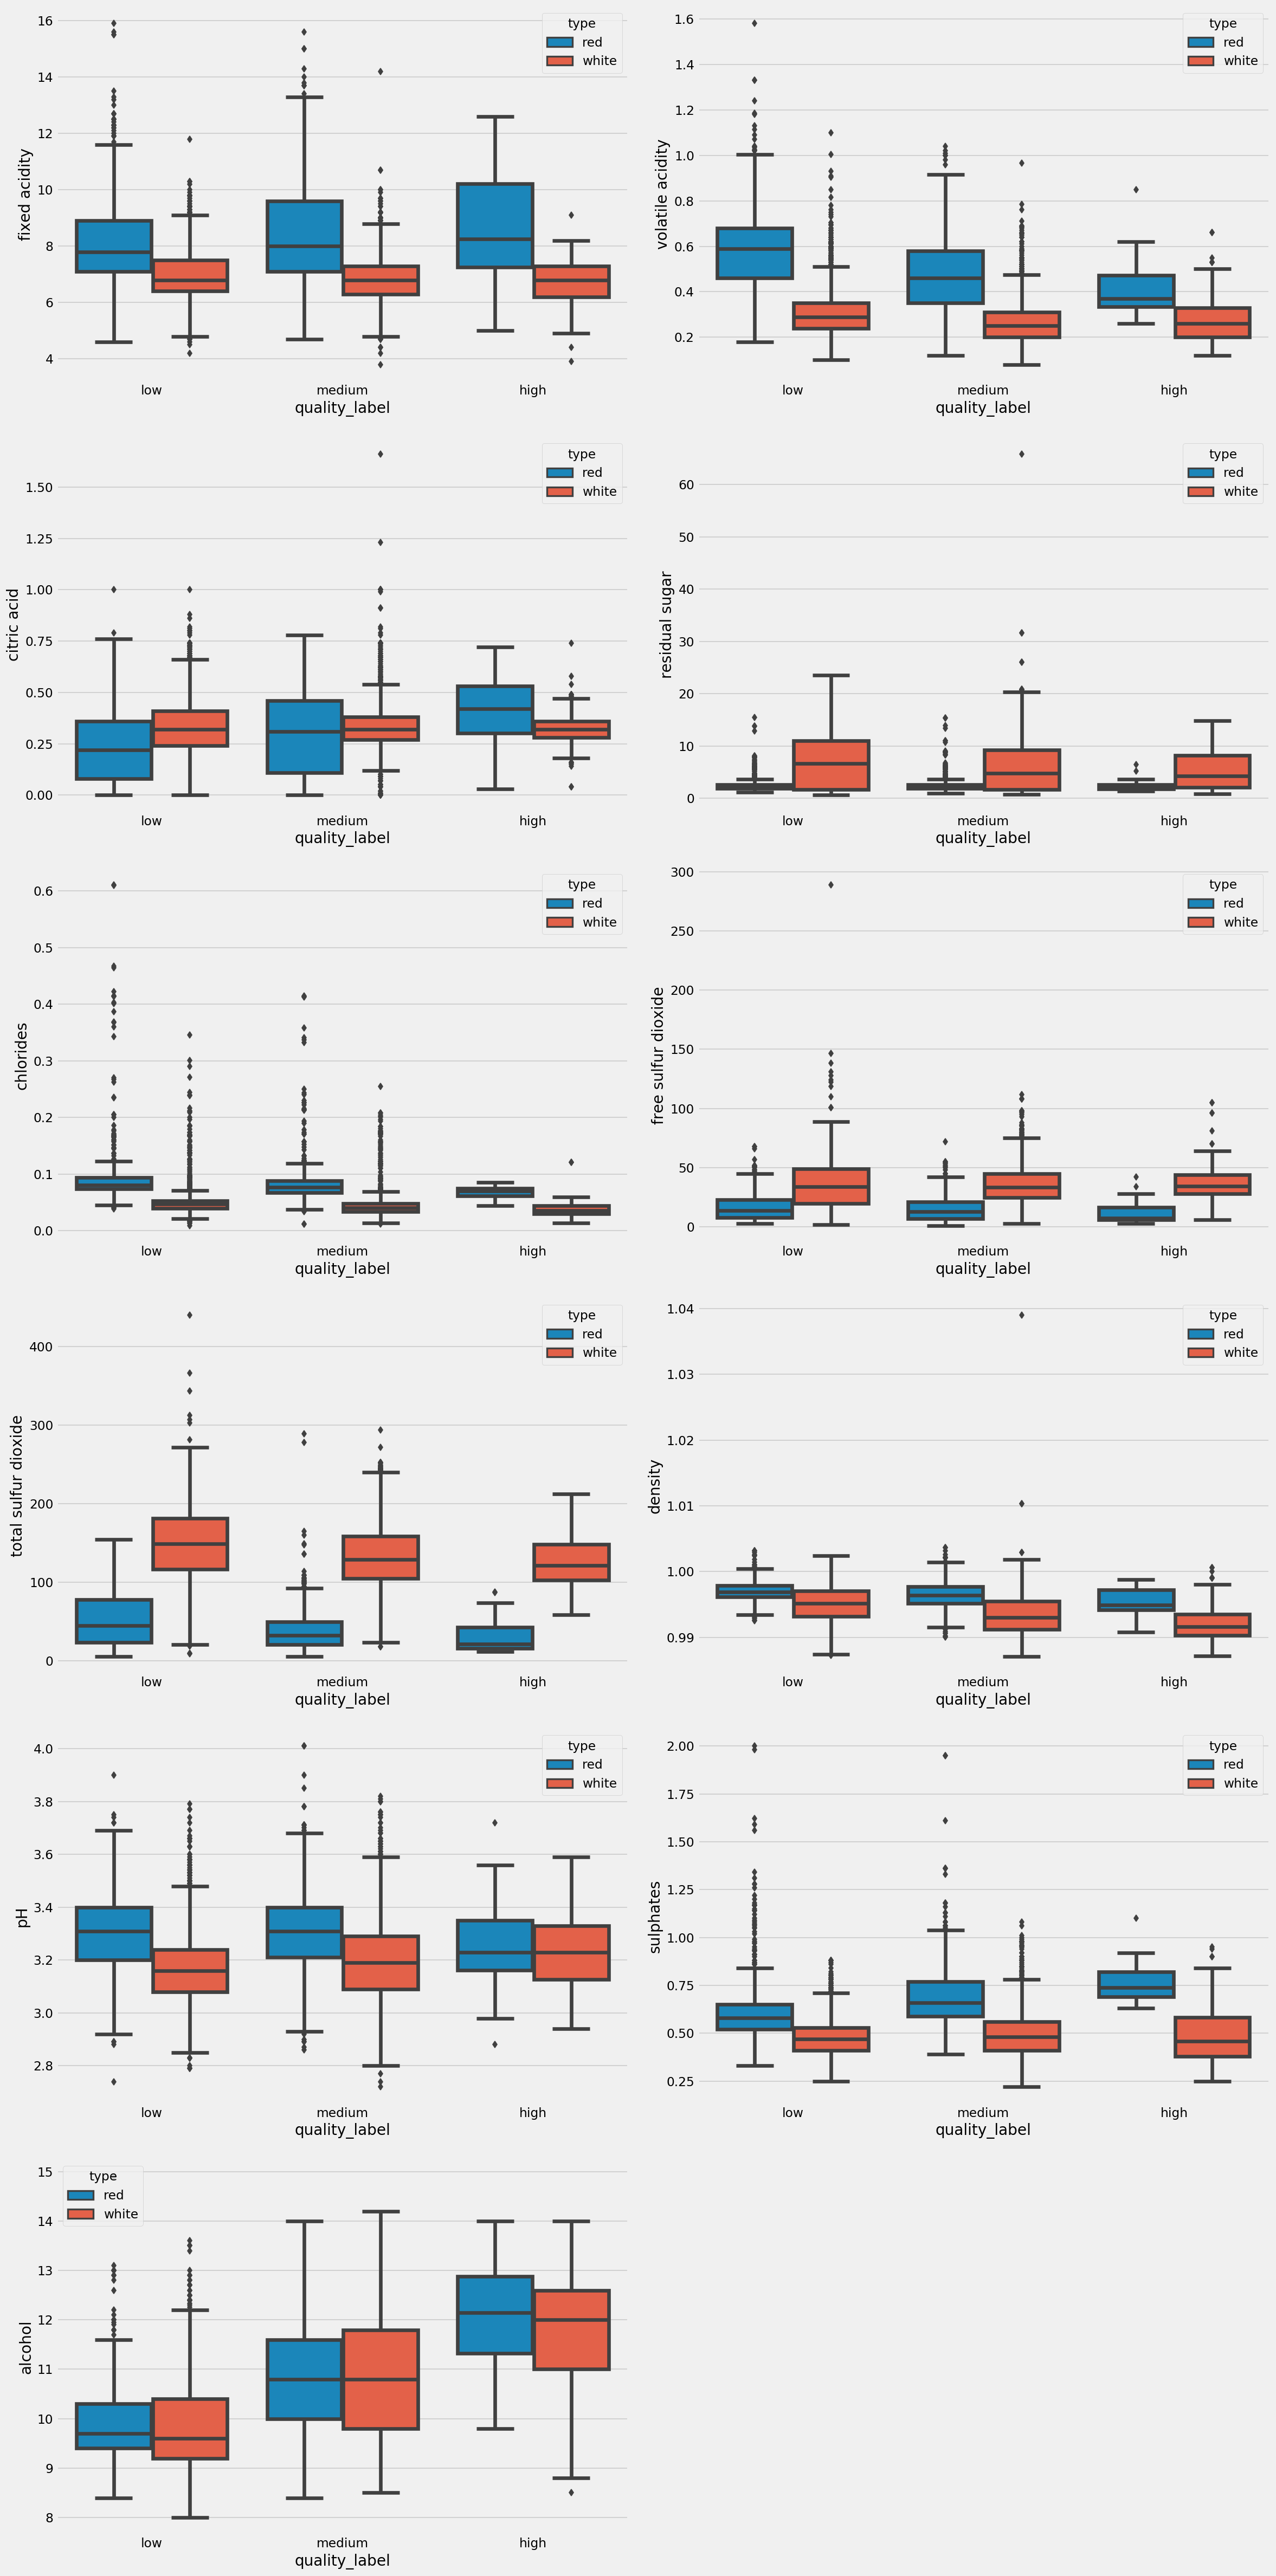

In [39]:
numeric_attribute = wine.columns[:-3]

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 40))
for attr, axis in zip(numeric_attribute, ax.flat):
    sns.boxplot(x="quality_label", y=attr, 
                data=wine, hue="type",
                ax=axis)
ax[5][1].set_visible(False)

plt.tight_layout(pad=1.5)

___

# Predictive Modeling

## Predict if wine is high quality (Binary Classification)

### One-hot Encoding

In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize

X = wine.iloc[:, :-3]
y = (wine.quality_label
         .apply(lambda x: x if x == "high" else "not high"))

In [24]:
dummy = LabelBinarizer()
X["is_white"] = dummy.fit_transform(wine.type)

### Train and test set split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.7,
                                                    random_state=0,
                                                    stratify=y)
labels = ["high", "not high"]

### Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Performance Metrics

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def plot_confusion_matrix(true_value, predicted_value, 
    labels, normalize=False):
    """
    Plot a heatmap illustrating a confusion matrix.
    
    Parameters:
        true_value (array): true values of target.
        predicted_value (array): values predicted by a model.
        labels (array): labels of targets
        normalized (boolean): whether to normalize the cm.(default:False)
        
    Return: None
    """
    
    # set the title depending on whether cm is normalized
    if normalize:
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix without normalizing"
    
    cm = confusion_matrix(true_value, predicted_value, labels)
    
    # normalizing the confusion matrix
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        
    # how a floating number is presented
    fmt = '.2f' if normalize else 'd'
    
    # plot the heatmap 
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(cm, ax=ax, square=True, 
                cmap="Blues", xticklabels=labels,
                yticklabels=labels, annot=True,
                fmt=fmt, cbar=False, annot_kws={"size": 20})
    
    ax.set(xticks=np.arange(cm.shape[1])+.5,
           yticks=np.arange(cm.shape[0])+.3,
           ylabel='True label',
           xlabel='Predicted label',
           title=title)
    
    fig.tight_layout()
    
    
def plot_roc_curve(y_test, y_scores, 
    labels, algorithms):
    """
    Plot a receiver operating characteristic curve to compare performance between models.
    
    Parameters:
        y_test (array): Testing target values.
        y_score (array): Target scores, can either be probability estimates of the positive class, 
                         confidence values, or non-thresholded measure of decisions.
        labels (array): labels of targets.
        algorithms (set): set of algorithm names.
    
    Returns: None
    """

    plt.figure(figsize=(10,10))
    
    # plot ROC curve for algorithms
    for alg in algorithms:
        
        # SVM is using decision function
        y_score = y_scores[alg][:, 0]
        
        # plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=labels[0])
        auc_score = np.round(auc(fpr, tpr), 2)
        plt.plot(fpr, tpr, "-", 
                 label=alg + " ({})".format(str(auc_score)))
    
    # set figure attributes
    plt.legend(title="Algorithms (AUC)", bbox_to_anchor=(1.05,.8),
               title_fontsize=20)
    plt.axis([0,1,0,1])
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title("ROC curve")
    
    
def prediction_performance(true_value, predicted_value, 
                           labels):
    """
    Show accuracy of a classifier, classification report and
    confusion matrix.
    
    Parameters:
        true_value (array): true values of target variables.
        predicted_value (array): values predicted by a model.
        labels (list): labels of taget variables.
    
    Return:None
    """
    accuracy = accuracy_score(true_value, predicted_value)
    
    print("Accuracy : {:.3f}".format(accuracy))
    
    print("--------------------------")
    
    print()
    
    print(classification_report(true_value, 
                                predicted_value, 
                                digits=4))
    
    print()
    
    print("--------------------------")
    
    print()
    
    # plot confusion matrix with heatmap
    plot_confusion_matrix(true_value, 
                          predicted_value, 
                          labels)
    
    # plot normalized confusion matrix with heatmap
    plot_confusion_matrix(true_value, 
                          predicted_value, 
                          labels, 
                          normalize=True)

### Record performance of every algorithms

In [28]:
algorithms = set()
y_scores = {}

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logistic_regress = LogisticRegressionCV(cv=5, 
                                        random_state=0,
                                        scoring="f1_weighted")
logistic_regress.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True,
                     scoring='f1_weighted', solver='lbfgs', tol=0.0001,
                     verbose=0)

In [30]:
algorithms.add("Logistic regression")
y_scores["Logistic regression"] = logistic_regress.predict_proba(X_test)

In [31]:
pd.DataFrame(logistic_regress.coef_, columns=X.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white
0,0.004445,0.003376,-0.000985,0.000396,0.005542,-0.002582,0.000112,0.010117,-0.001857,0.001214,-0.013819,-0.004593


Accuracy : 0.970
--------------------------

              precision    recall  f1-score   support

        high     0.0000    0.0000    0.0000        59
    not high     0.9697    1.0000    0.9846      1891

    accuracy                         0.9697      1950
   macro avg     0.4849    0.5000    0.4923      1950
weighted avg     0.9404    0.9697    0.9548      1950


--------------------------



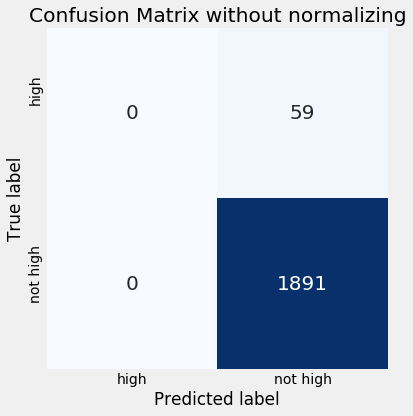

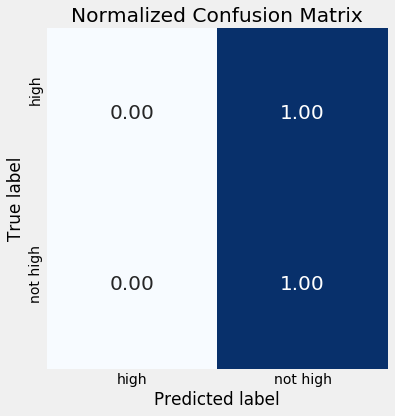

In [32]:
prediction_performance(y_test, 
                       logistic_regress.predict(X_test), 
                       labels)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
knn_grid  = GridSearchCV(knn, 
                         {"n_neighbors":range(1, 9)}, 
                         cv=10, 
                         scoring="f1_weighted")

knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_estimator_

In [ ]:
algorithms.add("KNN")
y_scores["KNN"] = knn_grid.best_estimator_.predict_proba(X_test)

In [ ]:
prediction_performance(y_test, 
                       knn_grid.best_estimator_.predict(X_test), 
                       labels)

### Gaussian Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
algorithms.add("Gaussian Naive Bayes")
y_scores["Gaussian Naive Bayes"] = gnb.predict_proba(X_test)

In [ ]:
prediction_performance(y_test, 
                       gnb.predict(X_test),
                       labels)

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=0, probability=True)
svm_grid = GridSearchCV(
    svm,
    {"C" :np.linspace(1,500, 5),
     "kernel":["rbf", "poly"]}, 
    cv=5, scoring="f1_weighted",
    n_jobs=-1
    )

svm_grid.fit(X_train, y_train)

In [ ]:
svm_grid.best_estimator_

In [ ]:
algorithms.add("SVM")
y_scores["SVM"] = svm_grid.best_estimator_.predict_proba(X_test)

In [ ]:
prediction_performance(y_test, 
                       svm_grid.best_estimator_.predict(X_test),
                       labels)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, 
                         {"max_depth":np.arange(1, 16), 
                          "criterion":["gini", "entropy"]}, 
                         cv=10, scoring="f1_weighted")

tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.best_estimator_

In [ ]:
algorithms.add("Decision Tree")
y_scores["Decision Tree"] = tree_grid.best_estimator_.predict_proba(X_test)

In [ ]:
prediction_performance(y_test, 
                       tree_grid.best_estimator_.predict(X_test),
                       labels)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

tree_explain = DecisionTreeClassifier(max_depth=4, 
                                      random_state=0, 
                                      criterion="gini")
tree_explain.fit(X_train, y_train)

export_graphviz(tree_explain, 
                out_file="classification_tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=X.columns, 
                impurity=False, filled=True)


with open("classification_tree.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, 
                            random_state=0,
                            max_features="sqrt")
rf.fit(X_train, y_train)

In [ ]:
algorithms.add("Random Forest")
y_scores["Random Forest"] = rf.predict_proba(X_test)

In [ ]:
prediction_performance(y_test, 
                       rf.predict(X_test), 
                       labels)

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(range(X_train.shape[1]), rf.feature_importances_, color="lightblue")
plt.yticks(np.arange(12), X.columns)
plt.ylabel("Features")
plt.xlabel("Feature Impotance")

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# set tuning parameters
learning_rate = np.logspace(-1.5, -1, num=5)
tree_number = range(100, 500, 200)
tree_depth = range(1, 4)

# tuning models with Grid search
gb = GradientBoostingClassifier(random_state=0)
gb_grid = GridSearchCV(gb, 
                       {"n_estimators":tree_number,
                        "max_depth":tree_depth,
                        "learning_rate":learning_rate},
                       n_jobs=-1, cv=5,
                       scoring="f1_weighted")

# train the model
gb_grid.fit(X_train, y_train)

In [ ]:
algorithms.add("Gradient Boosting")
y_scores["Gradient Boosting"] = tree_grid.best_estimator_.predict_proba(X_test)

In [ ]:
prediction_performance(y_test, 
                       gb_grid.best_estimator_.predict(X_test), 
                       labels)

### Compatring classification performances of different algorithms by ROC curve

In [ ]:
plot_roc_curve(y_test, y_scores, ["high"], algorithms)

___

___

## Predict quality of wine (multiclass classification)

In [ ]:
y = wine.quality_label

### Train and test sets split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7,
                                                    random_state=0, stratify=y)
labels = ["low", "medium", "high"]

Since there exists imbalance in qualities of wine, I 

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Prediction Performance

### Logistic Regression

In [ ]:
logistic_multi = LogisticRegression(solver="lbfgs", multi_class="ovr")
logistic_multi.fit(X_train, y_train)

In [ ]:
prediction_performance(y_test, logistic_multi.predict(X_test), labels)

### Support Vector Machine

In [ ]:
svm = SVC(random_state=0)
svm_grid_multi = GridSearchCV(svm, 
                        {"C":np.linspace(1, 20, 10)},
                        cv=5, 
                        scoring="accuracy")

In [ ]:
svm_grid_multi.fit(X_train, y_train)

In [ ]:
prediction_performance(y_test, 
                       svm_grid_multi.best_estimator_.predict(X_test),
                       labels)

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree_grid_multi = GridSearchCV(tree, 
                               {"max_depth":np.arange(3, 10)},
                               cv=5, 
                               scoring="accuracy")

In [ ]:
tree_grid_multi.fit(X_train, y_train)

In [ ]:
prediction_performance(y_test, 
                       tree_grid_multi.best_estimator_.predict(X_test), 
                       labels)

### Random Forest

In [ ]:
rf_multi = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_multi.fit(X_train, y_train)

In [ ]:
prediction_performance(y_test, rf_multi.predict(X_test), labels)

### Gradient Boosting

In [ ]:
learning_rate = np.logspace(-1.5, 0, num=10)
tree_number = np.arange(100, 501, 200)
tree_depth = np.arange(1, 5)

gb = GradientBoostingClassifier(random_state=0)
gb_grid_multi = GridSearchCV(gb,
                             {"learning_rate":learning_rate,
                              "n_estimators":tree_number,
                              "max_depth":tree_depth},
                             cv=5, n_jobs=-1,
                             scoring="accuracy")

In [ ]:
gb_grid_multi.fit(X_train, y_train)

In [ ]:
gb_grid_multi.best_estimator_

In [ ]:
prediction_performance(y_test, 
                       gb_grid_multi.best_estimator_.predict(X_test),
                       labels)